In [1]:
pip install pylatexenc

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


Final Quantum Teleportation Circuit:


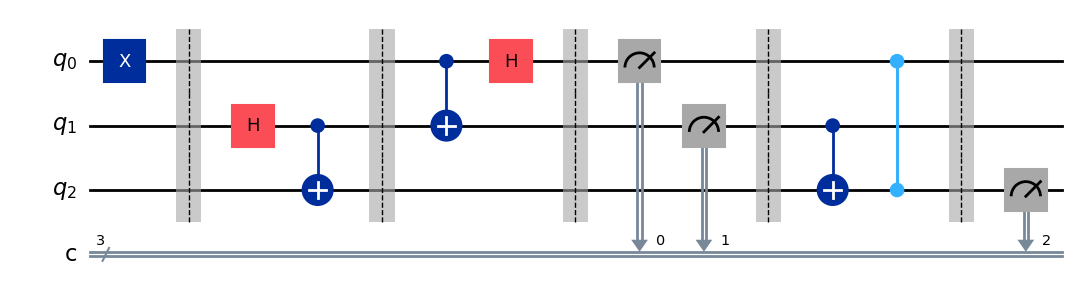


Simulation Results:


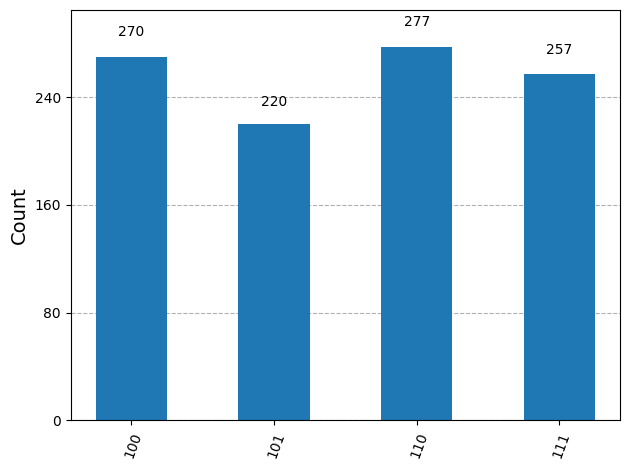

In [7]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile
from qiskit_aer import AerSimulator  # Correct import
from qiskit.visualization import plot_histogram, circuit_drawer
# from qiskit import Aer  <- This incorrect line is now removed

# 1. Create the Quantum Circuit
# We need 3 qubits and 3 classical bits.
# q0: The qubit to be teleported (Sharanya's qubit)
# q1: Part of the Bell pair (Sharanya's other qubit)
# q2: The other part of the Bell pair (Kartik's qubit)
circuit = QuantumCircuit(3, 3)

# 2. Applying an X gate on the qubit to be teleported
# This sets q0 to the state |1>, which is what we want to send.
circuit.x(0)
circuit.barrier()

# 3. Creating entanglement between Q1 and Q2
# This creates the Bell pair (the "portal")
circuit.h(1)
circuit.cx(1, 2)
circuit.barrier()

# 4. Entanglement between Q0 and Q1 (Sender's operations)
circuit.cx(0, 1)
circuit.h(0)
circuit.barrier()

# 5. Measure Q0 and Q1
# Sharanya measures her two qubits and stores the result in classical bits c0 and c1.
circuit.measure([0, 1], [0, 1])
circuit.barrier()

# 6. Apply correction gates (Receiver's operations)
# Kartik applies gates to his qubit (q2) based on the classical bits he receives.
circuit.cx(1, 2) # Apply CX if c1 is 1
circuit.cz(0, 2) # Apply CZ if c0 is 1
circuit.barrier()

# 7. ***MISSING STEP (ADDED)***
# Measure the final qubit (q2) to see if the |1> state arrived.
# The result is stored in classical bit c2.
circuit.measure(2, 2)

# Draw the final circuit
print("Final Quantum Teleportation Circuit:")
display(circuit_drawer(circuit, output="mpl"))

# 8. Simulate the circuit
sim = AerSimulator()  # <-- This line is now fixed
result = sim.run(transpile(circuit, sim), shots=1024).result()
counts = result.get_counts()

# Plot the histogram
print("\nSimulation Results:")
plot_histogram(counts)